## **Background**

The New York City Taxi and Limousine Commission (TLC) is responsible for regulating the city's taxi and for-hire vehicle services. The NYC TLC Trip Record dataset offers detailed insights into TLC vehicles trips, including information such as pickup and dropoff times, locations, number of passengers, trip distances, fare amounts, hailing/dispatch information and payment methods. This dataset is essential for analyzing TLC vehicle operations, understanding trip patterns, as well as fare information.


## **Analysis Problem Statement and Objectives**

### **Problem Statement**

1. Understanding the distribution of Variables such as trip duration, distance, passenger count,fare and tip amount
2. Identifying total trips count of each Vendor: Examining if the distribution of trips are balanced between vendors
3. Evaluating Payment Methods: Identifying preferred payment methods
4. Analyizing high-traffic time and location: Identifying distribution of trips within a day, a week, and Pick-up zone

### **Objective**

* Identifying operational insights to improve productivity, optimize vehicle distributions, and managing operational hours by providing actionable insights based on the analysis result of current dataset.

## **Data Collection and Loading**
• Data Access:
The NYC TLC Trip Record dataset is accessed from the Kaggle website under the title "NYC TLC Trip Record Data Repository."

• Initial Data Exploration:
Perform a preliminary examination of the dataset (e.g., check for null values, data types, and a basic statistical summary).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
db_master = pd.read_csv("NYC TLC Trip Record.csv")
db_master

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## **Data Understanding and Cleaning**

• **Dataset Overview**:
The NYC TLC Trip Record dataset used in this project contains data on the activities and transactions of the New York City Taxi and Limousine Commission. The dataset consists of 68,211 rows and 20 columns. 
 This dataset includes variables:
    
vendor ID, pickup and drop-off date and time, fare, number of passengers, trip distance, tips, tolls, total payment, trip type, and more. The dataset records transaction details for the year 2023 and consists of 68,211 rows and 20 columns.

- VendorID: A code indicating the LPEP provider that provided the record
- lpep_pickup_datetime: The date and time when the meter was engaged
- lpep_dropoff_datetime:  The date and time when the meter wasdisengaged
- Passenger_count: The number of passengers in the vehicle
- Trip_distance: The elapsed trip distance in miles was reported by the taximeter
- PULocationID: TLC Taxi Zone in which the taximeter was engaged
- DOLocationID: TLC Taxi Zone in which the taximeter was disengaged
- RateCodeID: The final rate code is in effect at the end of the trip
- Store_and_fwd_flag: This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor (Store and Forward)
- Payment_type: A numeric code signifying how the passenger paidfor the trip.
- Fare_amount: The time-and-distance fare is calculated by the meter
- MTA_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.
- Improvement_surcharge: $0.30 improvement surcharge assessed on hailed trips at the flagdrop.
- Tip_amount:  This field is automatically populated for credit card tips. Cash tips are not included.
- Tolls_amount: The total amount of all tolls paid in the trip.
- Total_amount: The total amount charged to passengers. Does not include cash tips.
- Trip_type: A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based
    on the metered rate in use but can be altered by the
    driver.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {db_master.shape}')
db_master.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [4]:
display(db_master.describe(), db_master.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [5]:
pd.set_option('display.max_colwidth', 1)
# Unique Data within each Column
listItem = []
for col in db_master.columns :
    listItem.append( [col, db_master[col].nunique(), db_master[col].unique()])

df_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [6]:
db_master.isna().sum()

VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
dtype: int64

Generally, we can see that the dataset above:

1. The NYC TLP Trip Record dataset imported as 'db_master' has 20 columns and 68,211 rows.
2. There are two columns containing time data, which are still stored as objects. This data should be stored in datetime format.
3. Some columns have missing values, namely store_and_fwd_flag, RatecodeID, passenger_count, ehail_fee, payment_type, trip_type, and congestion_surcharge. The missing values in each of these columns are stored as 'NaN'.


In [7]:
db_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Result: The variables lpep_pickup_datetime and lpep_dropoff_datetime have been converted from object to datetime so they can be used as time variables.

### **Identify and dealing with Missing Value**

In [8]:
# Percentage of Missing Value within each Column
db_master.isna().sum()/db_master.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

<Axes: >

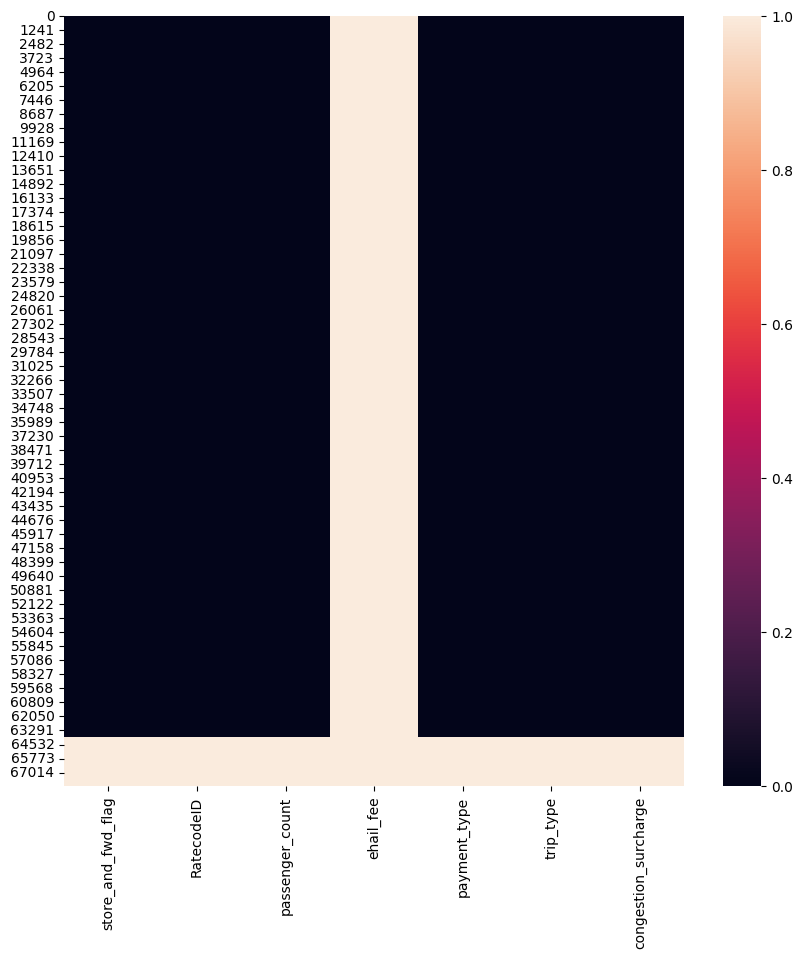

In [9]:
# Distribution of missing value
plt.figure(figsize=(10,10))
sns.heatmap(db_master[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())

In [10]:
# Detecting null values
null_percentage = db_master.isnull().mean()*10
less10 = null_percentage[null_percentage < 10].index.tolist()
between1030 = null_percentage[(null_percentage >= 10) & (null_percentage <= 30)].index.tolist()
more30 = null_percentage[null_percentage > 30].index.tolist() #ehail_fee hapus kolom

print(f"1. Columns with <10% missing value: \n{less10}\n\n2. Columns with 10-30% missing value: {between1030}\n\n3. Columns >30% missing value: {more30}")

1. Columns with <10% missing value: 
['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']

2. Columns with 10-30% missing value: ['ehail_fee']

3. Columns >30% missing value: []


**Missing Values in db_master:**
* The *missing values* in the `ehail_fee` column have a high proportion, reaching 100%.
* The *missing values* in the `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, and `congestion_surcharge` columns have similar proportions, around 6.3%. Based on the heat map above, the missing values in these columns do not have a strong correlation.

There are two ways to handle *missing values*:
1. **Remove rows/columns containing *missing values***. This approach will be used for the `ehail_fee` column because it has 100% missing values, and there is no original data in the database to fill in the missing values.

2. **Fill missing data with actual values or values that are as close as possible to the original values**. Missing values can be filled based on domain knowledge or statistical methods related to the column with missing values. As an alternative, missing data can be filled using:
   
   - **Fill with Mean**: For data that is normally distributed.
   - **Fill with Median**: For data that is not normally distributed.
   - **Fill with Mode**: For categorical data.

## **Data Cleaning**

1. The Variable ehail_fee is dropped as it has more tham 30% of Missing Value.

In [11]:
db_master.drop(columns=['ehail_fee'], inplace=True)

2. Filling in Columns with <10% Missing Values


In [12]:
db_master['store_and_fwd_flag'] = db_master['store_and_fwd_flag'].fillna(db_master['store_and_fwd_flag'].mode()[0])
db_master['RatecodeID'] = db_master['RatecodeID'].fillna(db_master['RatecodeID'].mode()[0])
db_master['passenger_count'] = db_master['passenger_count'].fillna(db_master['passenger_count'].median())
db_master['payment_type'] = db_master['payment_type'].fillna(db_master['payment_type'].mode()[0])
db_master['trip_type'] = db_master['trip_type'].fillna(db_master['trip_type'].mode()[0])
db_master['congestion_surcharge'] = db_master['congestion_surcharge'].fillna(db_master['congestion_surcharge'].median())

In [13]:
db_master.dropna()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


In [14]:
db_master.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Result: 

1. Variable with >30% Missing Value is dropped
2. There are no other related data to complete the missing values in the other variables (store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge)
3. passenger_count and congestion_surcharge is filled with Median instead of Mean because the data is not normally 
    distributed
4. store_and_fwd_flag, RatecodeID, payment_type, and trip_type are categorical data and is filled with Mode


3. Converting the lpep_pickup_datetime and lpep_pickup_datetime Variables into datetime format

In [15]:
db_master['lpep_pickup_datetime'] = pd.to_datetime(db_master['lpep_pickup_datetime'])
db_master['lpep_dropoff_datetime'] = pd.to_datetime(db_master['lpep_dropoff_datetime'])


4. Only selecting Rows with valid fare_amount. As the analysis will focus on productivity

In [16]:
db_master[db_master['fare_amount'] >= 0]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


5. Calculating the number of data points for each year to identify outliers.

In [17]:
yearly_data_count = db_master.groupby(db_master['lpep_pickup_datetime'].dt.year).size()
print(yearly_data_count)

lpep_pickup_datetime
2009    1    
2022    2    
2023    68208
dtype: int64


One Data from 2009 was found in the Dataset. This data will be removed from the dataset because it is considered an outlier.

In [18]:
db_master['pickup_year'] = db_master['lpep_pickup_datetime'].dt.year

In [19]:
db_master = db_master[db_master['pickup_year'] != 2009]

Result: The Outlier has been removed, and only 2022-2023 remains

6. Checking Duplicate Date

In [20]:
num_duplicates = db_master.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [21]:
# Extract invalid data where pickup_datetime is after dropoff_datetime
invalid_data1 = db_master[db_master['lpep_pickup_datetime'] > db_master['lpep_dropoff_datetime']]
invalid_data1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_year


There are no Duplicate data in NYC TLC Trip Record Dataset.

## **Cleaned Data**

In [22]:
listItem = []
for col in db_master.columns :
    listItem.append([col, db_master[col].dtype, db_master[col].isna().sum(),
                    db_master[col].nunique(), list(db_master[col].drop_duplicates().sample(2).values)]);

db_description = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(db_master.shape)
db_description

(68210, 20)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,66574,"[2023-01-29T16:42:11.000000000, 2023-01-04T13:37:29.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,66518,"[2023-01-06T18:40:53.000000000, 2023-01-12T08:40:04.000000000]"
3,store_and_fwd_flag,object,0,2,"[Y, N]"
4,RatecodeID,float64,0,6,"[99.0, 4.0]"
5,PULocationID,int64,0,226,"[131, 50]"
6,DOLocationID,int64,0,249,"[77, 33]"
7,passenger_count,float64,0,10,"[9.0, 7.0]"
8,trip_distance,float64,0,1870,"[9.57, 7.2]"
9,fare_amount,float64,0,2553,"[34.92, 16.13]"


## **Descriptive Analysis**

Adding a new Variable: Trip_Duration (in hour)
    
    Calculation: (Drop-off time - pick-up time)/3,600

In [23]:
db_master['trip_duration'] = (db_master['lpep_dropoff_datetime'] - db_master['lpep_pickup_datetime']).dt.total_seconds() / 3600

In [24]:
descriptive_stats = db_master[['trip_distance', 'trip_duration', 'passenger_count']].describe()
print(descriptive_stats)

       trip_distance  trip_duration  passenger_count
count  68210.000000   68210.000000   68210.000000   
mean   8.114858       0.301409       1.295851       
std    585.110244     1.247541       0.950641       
min    0.000000       0.000000       0.000000       
25%    1.110000       0.120278       1.000000       
50%    1.850000       0.190000       1.000000       
75%    3.210000       0.291389       1.000000       
max    120098.840000  23.998056      9.000000       


### **Data Analysis & Visualization**

#### 1. Adding New Column containing trip speed based on trip duration and distance

In [25]:
# Calculating Trip Duration
db_master['trip_duration'] = db_master['lpep_dropoff_datetime'] - db_master['lpep_pickup_datetime']

# Converting the trip duration into minutes
db_master['trip_duration'] = db_master['trip_duration'].dt.total_seconds() / 60  # Convert seconds to minutes


In [26]:
db_master['trip_duration']

0        11.016667
1        6.766667 
2        6.333333 
3        5.816667 
4        5.966667 
           ...    
68206    13.000000
68207    8.000000 
68208    16.000000
68209    18.000000
68210    16.000000
Name: trip_duration, Length: 68210, dtype: float64

In [27]:
# Calculate trip speed in kilometers per hour (km/h)
db_master['trip_speed_kmh'] = (db_master['trip_distance'] * 1.60934) / (db_master['trip_duration'] / 60).where(db_master['trip_duration'] != 0, 0.0001)

# Display the updated DataFrame with the new column
print(db_master[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'trip_duration', 'trip_speed_kmh']])



      lpep_pickup_datetime lpep_dropoff_datetime  trip_distance  \
0     2023-01-01 00:26:10  2023-01-01 00:37:11    2.58            
1     2023-01-01 00:51:03  2023-01-01 00:57:49    1.81            
2     2023-01-01 00:35:12  2023-01-01 00:41:32    0.00            
3     2023-01-01 00:13:14  2023-01-01 00:19:03    1.30            
4     2023-01-01 00:33:04  2023-01-01 00:39:02    1.10            
...                   ...                  ...     ...            
68206 2023-01-31 22:29:00  2023-01-31 22:42:00    4070.82         
68207 2023-01-31 22:40:00  2023-01-31 22:48:00    2.14            
68208 2023-01-31 23:46:00  2023-02-01 00:02:00    3.44            
68209 2023-01-31 23:01:00  2023-01-31 23:19:00    3.03            
68210 2023-01-31 23:51:00  2023-02-01 00:07:00    5.82            

       trip_duration  trip_speed_kmh  
0      11.016667      22.613540       
1      6.766667       25.828718       
2      6.333333       0.000000        
3      5.816667       21.580834       


### **Checing Data Distribution with Shapiro**

In [28]:
from scipy.stats import shapiro
# 1. Distribution of passenger_count
stat_passenger, pval_passenger = shapiro(db_master['passenger_count'])

pval_passenger 

if pval_passenger < 0.05 :
    print(f"Variable passenger_count is not normally distributed.")
else:
    print(f"Variable passenger_count is normally distributed.")   

Variable passenger_count is not normally distributed.


In [29]:
# 2. Distribution of Trip Distance
stat_distance, pval_distance = shapiro(db_master['trip_distance'])

pval_distance 

if pval_distance < 0.05 :
    print(f"Variable trip_distance is not normally distributed.")
else:
    print(f"Variable trip_distance is normally distributed.")   

Variable trip_distance is not normally distributed.


In [30]:
# 3. Distribution of fare_amount
stat_fare, pval_fare = shapiro(db_master['fare_amount']) 

pval_fare 

if pval_fare < 0.05 :
    print(f"Variable fare_amount is not normally distributed.")
else:
    print(f"Variable fare_amount is normally distributed.")   

Variable fare_amount is not normally distributed.


In [31]:
# 4. Distribution of tip_amount
stat_tip, pval_tip = shapiro(db_master['tip_amount']) 

pval_tip 

if pval_tip < 0.05 :
    print(f"Variable tip_amount is not normally distributed.")
else:
    print(f"Variable tip_amount is normally distributed.")   

Variable tip_amount is not normally distributed.


In [32]:
# 5. Distribution of trip_duration
stat_duration, pval_duration = shapiro(db_master['trip_duration']) 

pval_duration 

if pval_duration < 0.05 :
    print(f"Variable trip_duration is not normally distributed.")
else:
    print(f"Variable trip_duration is normally distributed.")   

Variable trip_duration is not normally distributed.


In [33]:
# 5. Distribution of trip_speed_kmh
stat_speed, pval_speed = shapiro(db_master['trip_speed_kmh']) 

pval_speed 

if pval_speed < 0.05 :
    print(f"Variable trip_speed_kmh is not normally distributed.")
else:
    print(f"Variable trip_speed_kmh is normally distributed.") 

Variable trip_speed_kmh is not normally distributed.


**Results of Data Distribution Check:**

1. The data distribution check was performed using the Shapiro method.
2. Variables tested: passenger_count, trip_distance, fare_amount, tip_amount, trip_duration, trip_speed_kmh.
3. All tested variables do not follow a normal distribution.

## **Data Visualization**

### **Number of Trips Comparison Between Two Vendors**

In [34]:
# Check unique values in VendorID column
print(db_master['VendorID'].unique())

[2 1]


In [35]:
# Map VendorID to Vendor Names
vendor_mapping = {1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'}

db_master['VendorName'] = db_master['VendorID'].map(vendor_mapping)

In [36]:
totaltrips_vendor = db_master['VendorID'].value_counts().reset_index()
totaltrips_vendor.columns = ['VendorID', 'Total Trips']
# Map VendorID to Vendor Names for readability
vendor_mapping = {1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'}
totaltrips_vendor['VendorID'] = totaltrips_vendor['VendorID'].map(vendor_mapping)

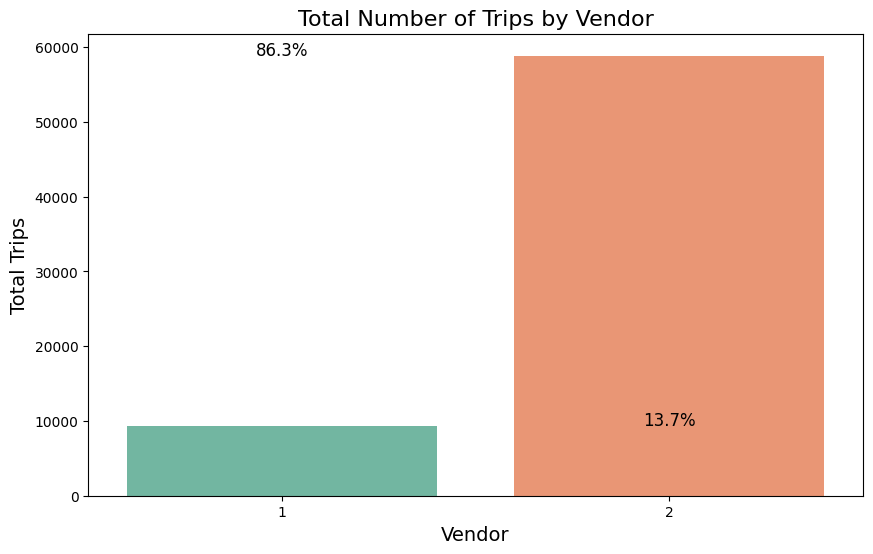

In [37]:
# Count the total number of trips for each vendor
totaltrips_vendor = db_master['VendorID'].value_counts().reset_index()
# Rename columns for clarity
totaltrips_vendor.columns = ['VendorID', 'Total Trips']
# Calculate the total number of trips
total_trips_all_vendors = totaltrips_vendor['Total Trips'].sum()
# Calculate the percentage of total trips for each vendor
totaltrips_vendor['Percentage'] = (totaltrips_vendor['Total Trips'] / total_trips_all_vendors) * 100


plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='Total Trips', data=totaltrips_vendor, palette='Set2')
for index, row in totaltrips_vendor.iterrows():
    plt.text(index, row['Total Trips'] + 20, f'{row["Percentage"]:.1f}%', 
             ha='center', fontsize=12, color='black')
plt.title('Total Number of Trips by Vendor', fontsize=16)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Total Trips', fontsize=14)
plt.show()

### **Result:**
1. Based on the Bar Chart above, Creative Mobile Technologies, LLC. dominates 86.3% portion of the dataset. This means that the majority of trips in the dataset were made by Creative Mobile Technologies, LLC.
2. Only 13.7% of the total trips were made by  Verifone Inc.

### **Actionable Steps:**
1. Verifone Inc. could start to examine why Verifone Inc. has only 12% of the total trips.        
    - Is there an operational issue, market competition, or data anomaly that results in a lower share?
    - Is Verifone Inc. underrepresented due to factors like fewer taxis or limited availability in certain regions?
    - Verifone Inc could explore opportunities for growth and expansion, such as adding and optimizing fleets and increasing partnerships in high-traffic public areas like office buildings, hotels, airports, train stations, etc.
2. Market Strategy Adjustments
    - If Verifone Inc is underperforming due to market saturation or customer preference, consider adjusting marketing strategies, such as offering promotions, loyalty programs, or exclusive deals to attract more riders.
    - Collaborate with local businesses or events to improve visibility Verifone Inc in areas where Creative Mobile Technologies, LLC. has a stronger presence.

3. Ensure Data Quality and Representation
    -   Considering the large gap of trips between the two vendors. It is important to ensure that the dataset is representative of both providers and that there is no bias due to incomplete or missing data.


## **Average Tips of each Vendors**

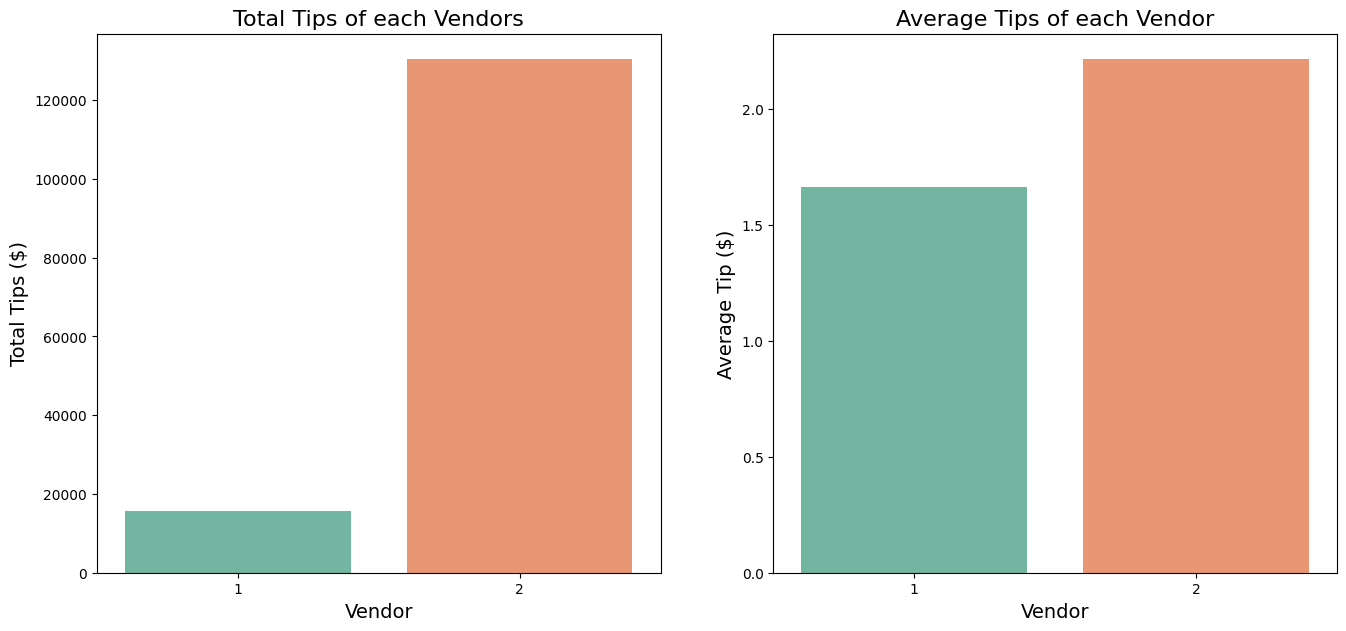

   VendorID  Total Tips  Average Tip
0  1         15559.29    1.665342   
1  2         130337.65   2.214104   


In [38]:
# Calculate total tips and average tips for each vendor
total_tips_vendor = db_master.groupby('VendorID')['tip_amount'].sum().reset_index()
avg_tips_vendor = db_master.groupby('VendorID')['tip_amount'].mean().reset_index()
# Rename columns for clarity
total_tips_vendor.columns = ['VendorID', 'Total Tips']
avg_tips_vendor.columns = ['VendorID', 'Average Tip']
# Create a combined DataFrame for plotting
combined_tips = total_tips_vendor.merge(avg_tips_vendor, on='VendorID')

# Total Tips by Vendor
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
sns.barplot(x='VendorID', y='Total Tips', data=combined_tips, ax=ax[0], palette='Set2')
ax[0].set_title('Total Tips of each Vendors', fontsize=16)
ax[0].set_xlabel('Vendor', fontsize=14)
ax[0].set_ylabel('Total Tips ($)', fontsize=14)

# Average Tips by Vendor
sns.barplot(x='VendorID', y='Average Tip', data=combined_tips, ax=ax[1], palette='Set2')
ax[1].set_title('Average Tips of each Vendor', fontsize=16)
ax[1].set_xlabel('Vendor', fontsize=14)
ax[1].set_ylabel('Average Tip ($)', fontsize=14)
plt.show()

# Display the resulting DataFrame (with total and average tips)
print(combined_tips)


#### **Insights**:
Tips are often highly influenced by performance, both from the perspective of the driver and the passenger's experience. 

1. Based in the Total Tips of each Vendors Chart, it can be seen that Creative Mobile Technologies has a significantly higher Tips comparing to Verifone. However, this could be due to the broad difference in the number of Trips.
    
2. The Average Tips of each Vendor calculates the average tips generated in each trip instead of total tips. This will better measure the performance of each Vendor, putting aside the total trip differences. However, Creative Mobile Technologies still has a higher result than Verifone.

### **Actionable Steps**:
1. Assess Drivers' Performance through Customer Feedbacks and internal evaluations:
    - Implement a feedback system where passengers rate the overall experience or specific service aspects such as the driver's attitude, cleanliness, and timeliness.
    - Conduct internal audits or Performance Review of driver performance, including reviews of driver ratings, feedback, or qualitative observations.

2. Encourage a knowledge-sharing program where vendors can learn from each other’s successful practices
    - Organize regular performance reviews or workshops where drivers from both vendors can exchange best practices and tips for improving customer service and overall ride quality.




## **Comparison of Total Number of Trips and Total Revenue**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Map VendorID to Vendor Names
vendor_mapping = {1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'}

In [40]:
# Adding a New Column: total_revenue
# Convert VendorID to categorical for better labeling
db_master['VendorID'] = db_master['VendorID'].map({1: 'Verifone', 2: 'Creative Mobile Technologies'})

# Calculate total revenue
db_master['total_revenue'] = db_master['fare_amount'] + db_master['tip_amount'] + db_master['tolls_amount']  # Adding fare, tip, and tolls


<Figure size 1400x700 with 0 Axes>

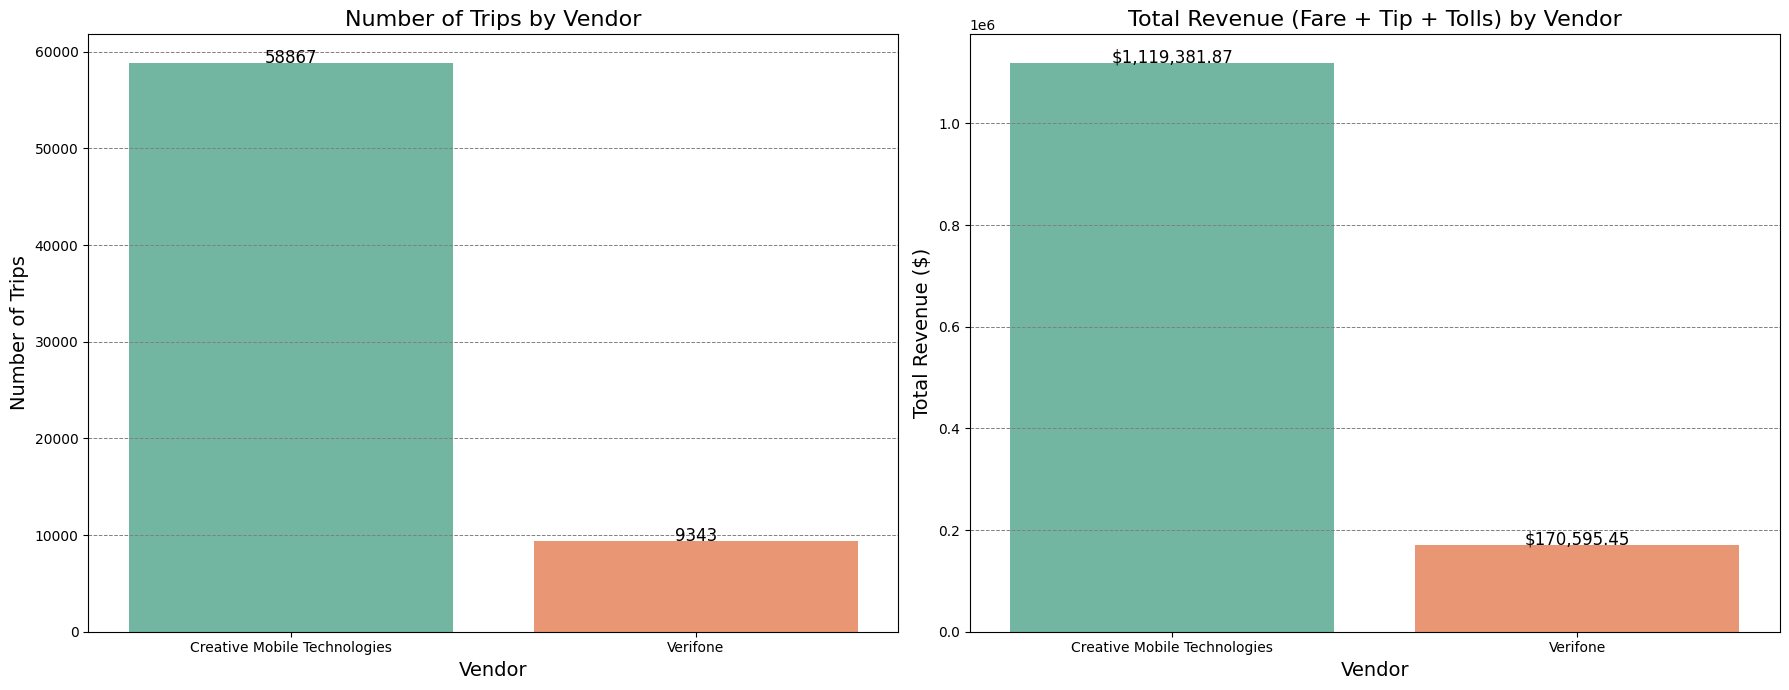

In [41]:
plt.figure(figsize=(14, 7))

# Total number of trips by vendor
trip_counts = db_master.groupby('VendorID')['VendorID'].count()

# Total revenue by vendor
total_revenue = db_master.groupby('VendorID')['total_revenue'].sum()

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(x=trip_counts.index, y=trip_counts.values, ax=ax[0], palette="Set2")
ax[0].set_title('Number of Trips by Vendor', fontsize=16)
ax[0].set_xlabel('Vendor', fontsize=14)
ax[0].set_ylabel('Number of Trips', fontsize=14)
ax[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray')

for i, value in enumerate(trip_counts.values):
    ax[0].text(i, value + 5, str(value), ha='center', fontsize=12, color='black')

sns.barplot(x=total_revenue.index, y=total_revenue.values, ax=ax[1], palette="Set2")
ax[1].set_title('Total Revenue (Fare + Tip + Tolls) by Vendor', fontsize=16)
ax[1].set_xlabel('Vendor', fontsize=14)
ax[1].set_ylabel('Total Revenue ($)', fontsize=14)
ax[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray')

for i, value in enumerate(total_revenue.values):
    ax[1].text(i, value + 50, f"${value:,.2f}", ha='center', fontsize=12, color='black')
palette = sns.color_palette("Set2", n_colors=len(db_master['VendorID'].unique()))
plt.tight_layout()
plt.show()


### **Analyzing Peak Hours and Days**

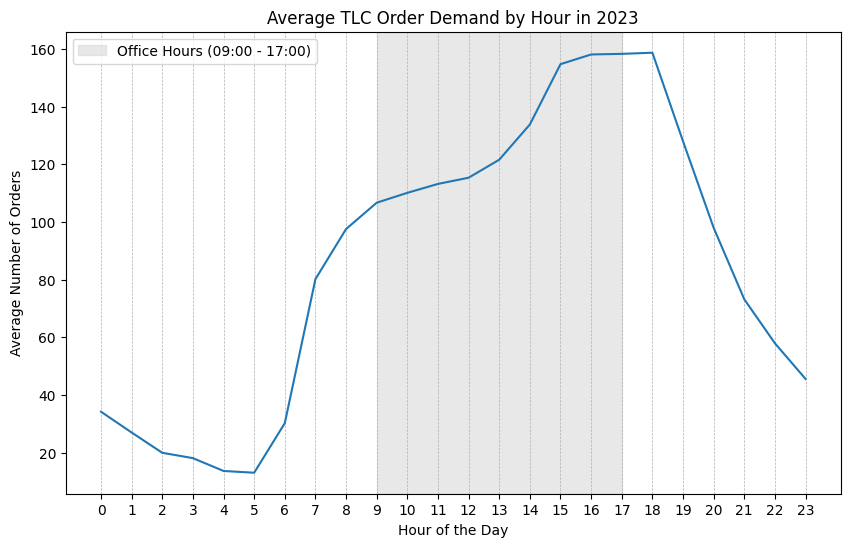

In [42]:
# Extract the hour from the pickup datetime
db_master['pickup_hour'] = db_master['lpep_pickup_datetime'].dt.hour
# Count the number of orders by hour
hourly_order_counts = db_master.groupby('pickup_hour').size()
# Calculate the average number of orders per hour
average_orders_by_hour = hourly_order_counts / db_master['lpep_pickup_datetime'].dt.date.nunique()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_orders_by_hour.index, y=average_orders_by_hour.values, palette="Set2")
# Highlight office hours (09:00 - 17:00)
plt.axvspan(9, 17, color='lightgray', alpha=0.5, label='Office Hours (09:00 - 17:00)')

plt.title('Average TLC Order Demand by Hour in 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Orders')

plt.xticks(range(0, 24))
plt.grid(axis='x', linestyle='--', linewidth=0.5)  # vertical grid lines
plt.legend()  # Show the legend to indicate the highlighted area

plt.show()


### **Insights:** 
The average number of NYC TLC Trips fluctuates throughout the day. The Histogram above demonstrates the trend and peak hours for NYC TLC. Based on the histrogram:
1. High Traffic Hour    : 15:00 - 18:00
2. Low Traffic Hour     : 00:00 - 06:00

Assuming that the common office hour is 09:00-17:00 (as highlighted grey in the graph), it can be seen that the demand and activity for TLC start to increase 2 hours before work hour starts, and decreases an hour after work hour ends.

### **Actionable Steps:**
1. Optimize and Adjust Fleet availability based on Peak Hours
    - Increase vehicles availabilitydDuring High Traffic Hours (15:00 - 18:00) to reduce wait times and meet higher demands
    - Reduce the number of vehicles available during the low traffic hours (midnight to 6 AM), as the demand for trips is low. 
2. Promote rides for early commuters and post-work rides to balance out low-traficc hours.
    - Offer discounts or ride-sharing options to encourage early rides, helping balance the load between vendors and maximize vehicle utilization during these hours.

## **Number of Trips within a week**

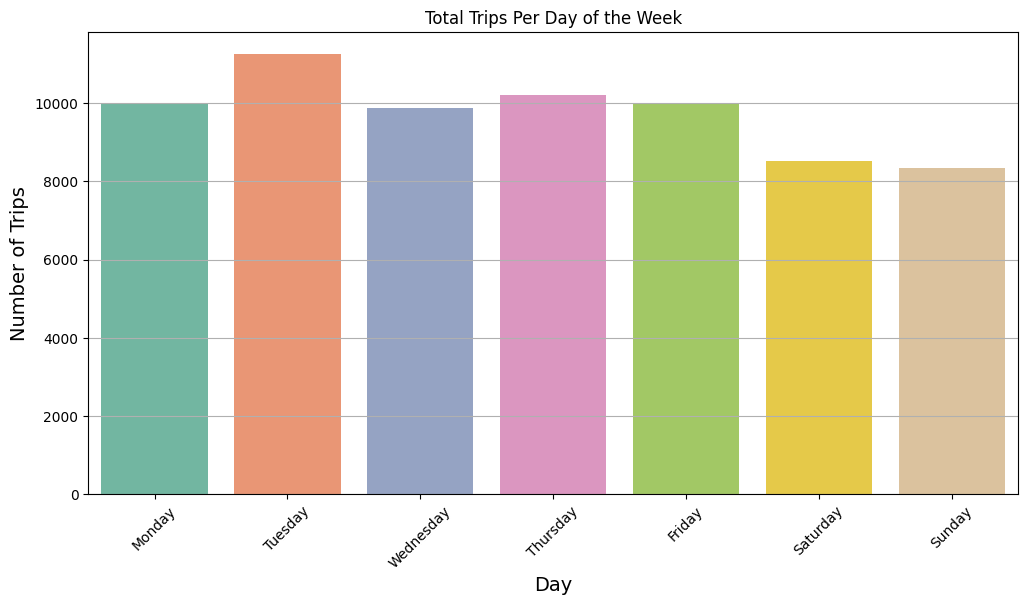

In [43]:
# Extract the day of the week from the pickup datetime column
db_master['pickup_day'] = db_master['lpep_pickup_datetime'].dt.day_name()

# Count the trips for each day of the week and reorder the days from Monday to Sunday
trips_by_day = db_master['pickup_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
trips_by_day.columns = ['Day of the Week', 'Trip Count']

# Plot a bar chart to visualize the trips per day
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of the Week', y='Trip Count', data=trips_by_day, palette='Set2')
plt.title('Total Trips Per Day of the Week')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [44]:
# Data Grouping and Filtering
trips_by_day_vendor = db_master.groupby(['pickup_day', 'VendorID']).size().reset_index(name='Total Trips')

trips_by_day_vendor['pickup_day'] = pd.Categorical(trips_by_day_vendor['pickup_day'], 
                                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                                   ordered=True)
# Filter VendorID
creative_mobile_data = trips_by_day_vendor[trips_by_day_vendor['VendorID'] == 'Creative Mobile Technologies']
verifone_data = trips_by_day_vendor[trips_by_day_vendor['VendorID'] == 'Verifone']

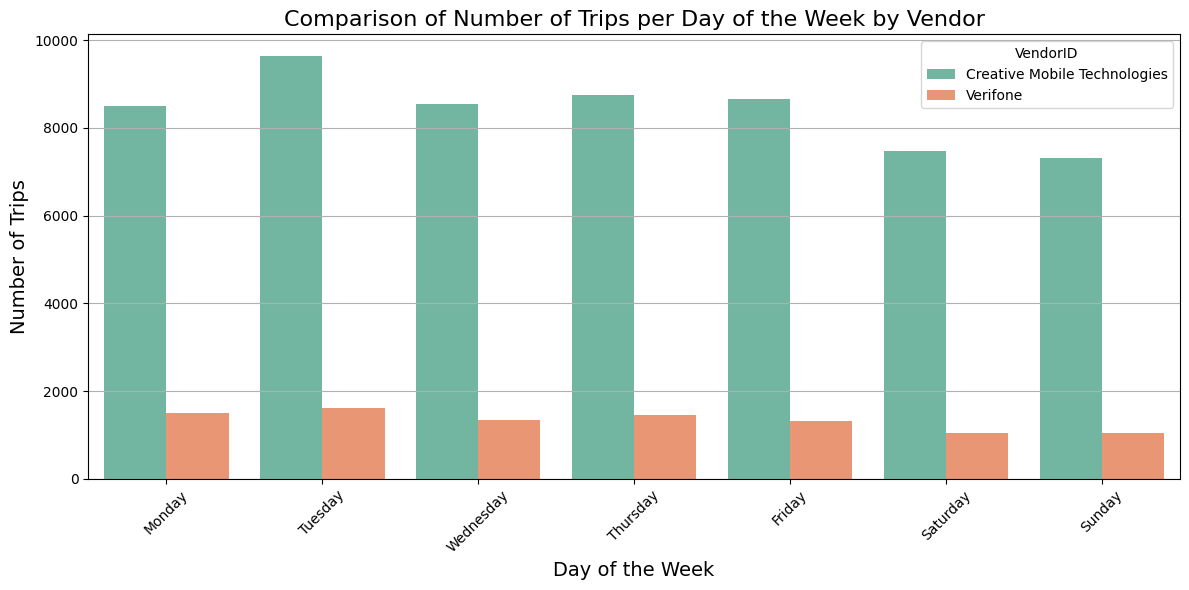

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day', y='Total Trips', hue='VendorID', data=trips_by_day_vendor, palette='Set2', ci=None)

plt.title('Comparison of Number of Trips per Day of the Week by Vendor', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


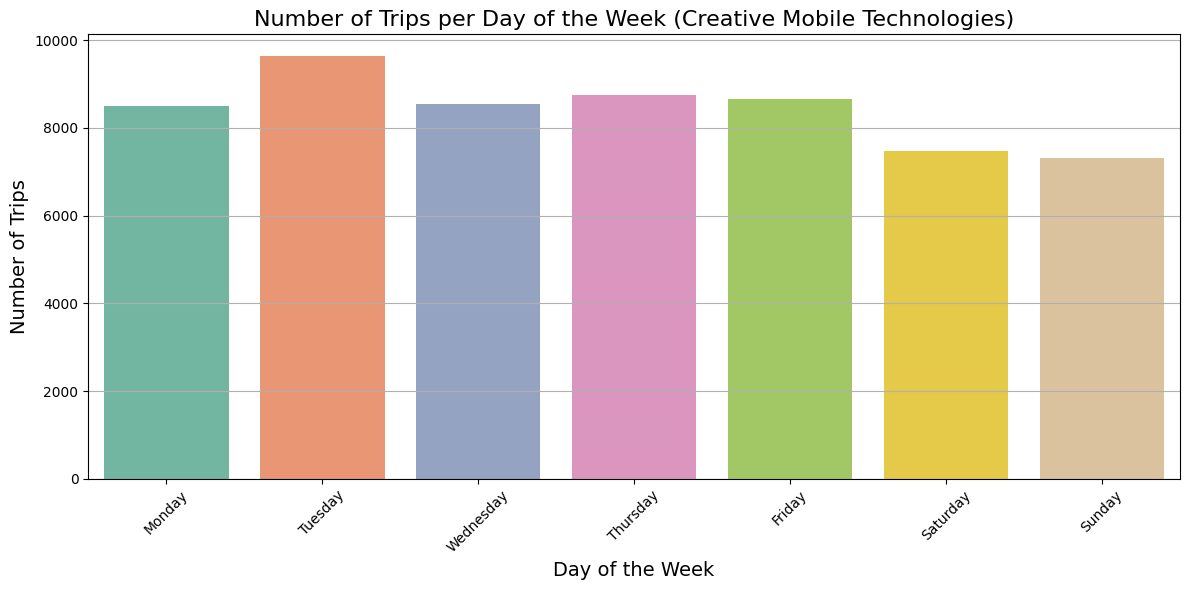

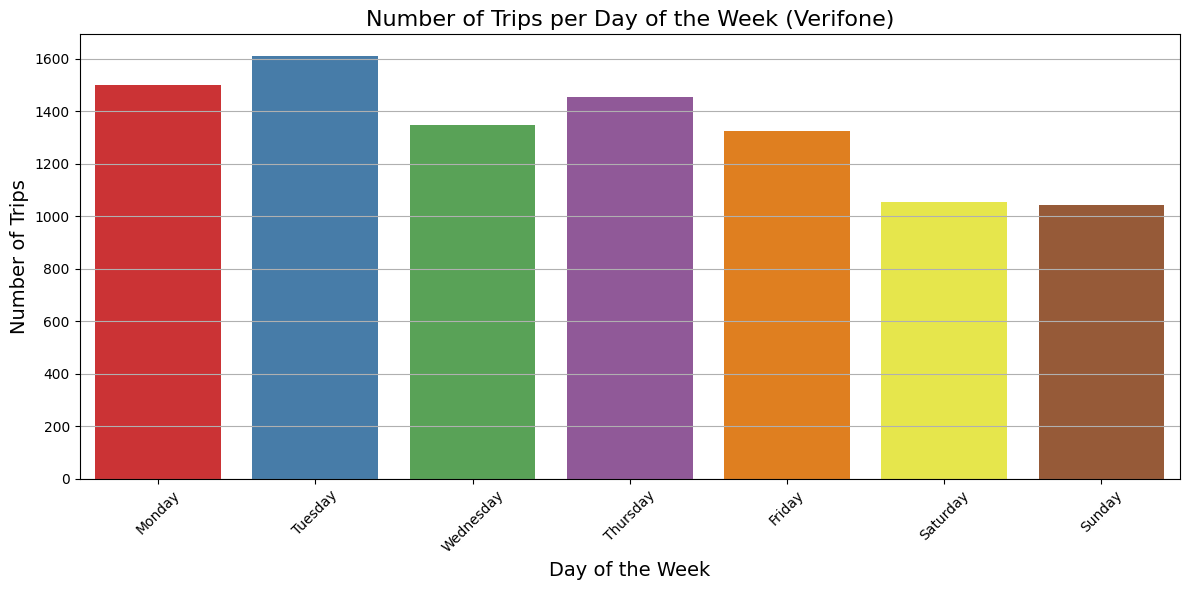

In [46]:
# Create the first bar chart for Creative Mobile Technologies
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day', y='Total Trips', data=creative_mobile_data, palette='Set2')
plt.title('Number of Trips per Day of the Week (Creative Mobile Technologies)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create the second bar chart for Verifone
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day', y='Total Trips', data=verifone_data, palette='Set1')
plt.title('Number of Trips per Day of the Week (Verifone)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### **Insights**:
1. The number of trips on weekdays are visibly greater comparing to weekends, and this applies to both vendors.
2. This may reflects the high traffic of activities connecting to office workdays (Monday-Friday)
3. Tuesdays appears to have a slightly higher TLC trips comparing to other weekdays

### **Actionable Plan:**
1. Further Data and Analysis are required to investigate the cause of these differences. 

## **Most Popular Payment Method**

  payment_type  PaymentCount
0  Credit card  45009       
1  Cash         22632       
2  No charge    472         
3  Dispute      95          
4  Unknown      2           


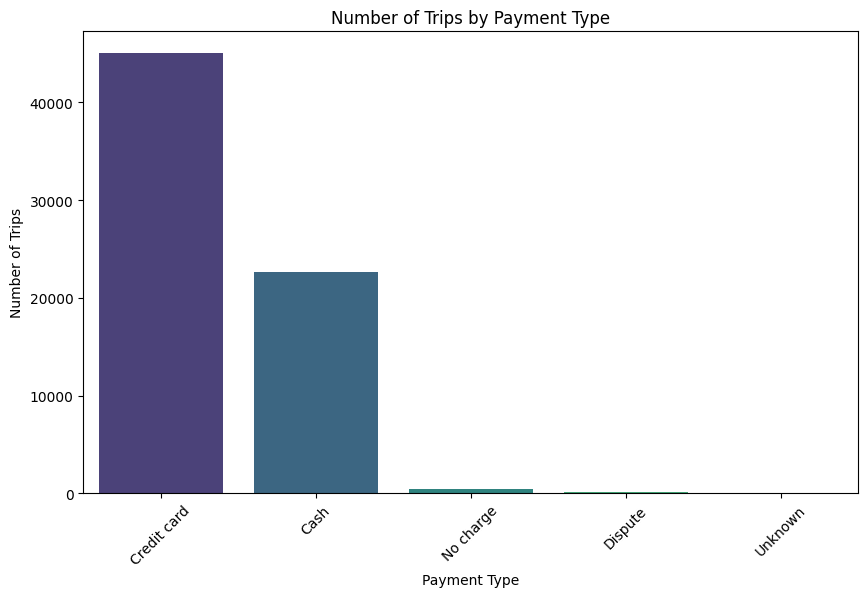

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Map the numeric payment type values to their corresponding names
payment_type_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Replace the numeric payment type values with their names
db_master['payment_type'] = db_master['payment_type'].replace(payment_type_mapping)

# number of trips for each payment type
vendor_payment_counts = db_master['payment_type'].value_counts().reset_index()
vendor_payment_counts.columns = ['payment_type', 'PaymentCount']
print(vendor_payment_counts)

# number of trips by payment type
plt.figure(figsize=(10, 6))
sns.barplot(data=vendor_payment_counts, x='payment_type', y='PaymentCount', palette='viridis')
plt.title('Number of Trips by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)  # Rotate x-tick
plt.show()


### **Insights:**
1. Generally, the most popular payment type is by Credit Card, followed by Cash
2. This indicates the preferrence of electronic payments amongst passengers
3. Payment type 3-6 does not qualify as payment methods, because they indicates invalid or no-payment trips.

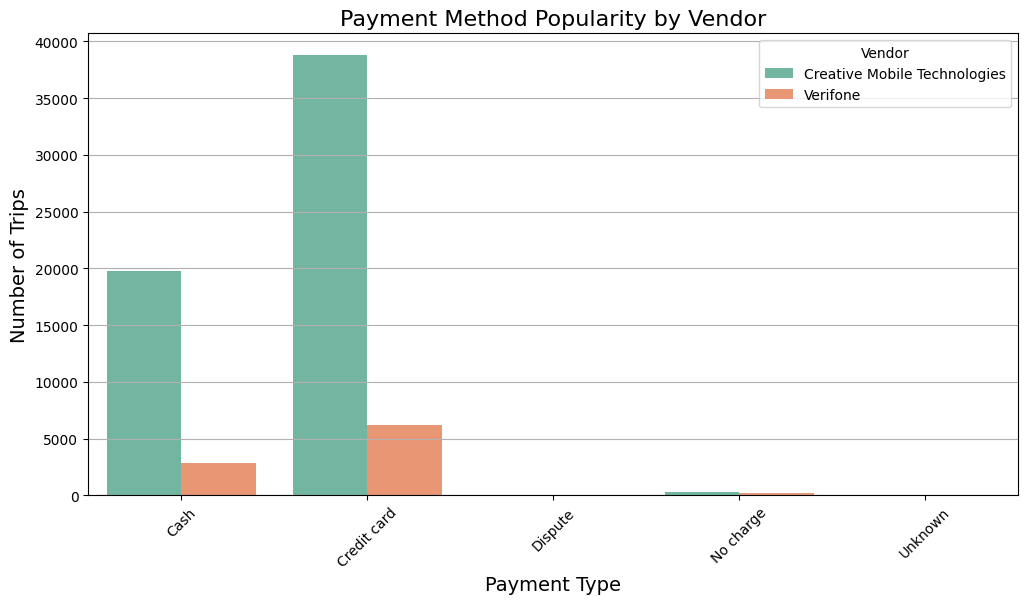

In [48]:
# Group by VendorID and payment_type to get the count of trips per payment method per vendor
payment_by_vendor = db_master.groupby(['VendorID', 'payment_type']).size().reset_index(name='PaymentCount')

# Create a double bar plot showing number of trips by payment type for each vendor
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_type', y='PaymentCount', hue='VendorID', data=payment_by_vendor, palette='Set2')

plt.title('Payment Method Popularity by Vendor', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Vendor', loc='upper right')
plt.grid(axis='y')

# Show the plot
plt.show()


### **Insights:**
1. Trips of both vendors have similar preferrences in payment method: By Credit Card, and followed by cash.

### **Action Plans:**
1. Both Vendors may encourage other electronic payment methods to boost payment transparency and easier financial reporting. There are several recommendations:
    - Rewards or cashback programs for electronic payments. This can be done via partnerships with banks and ewallet companies.
    - Provide QRIS and touchless credit card payment method to optimize duration of payment process.
2. Strategic Membership program
    - TLC vendors can create a membership program for frequent customers to collect points, rewards, subscriptions and buy prepaid credits for Taxi rides.
    - This membership system can be supported by a mobile application for easier access.

Note:
1 = Creative Mobile Technologies, LLC. 
2 = VeriFone Inc.

Result:
1. VeriFone's Drivers drive twice as fast as Creative Mobile Technologies drivers drive with the average speed of 75.8km/h
2. Creative Mobile Technologies' Drivers drive relatively slow, at 34.8km/h in average

## **Total Trips based on Pick-up Location**

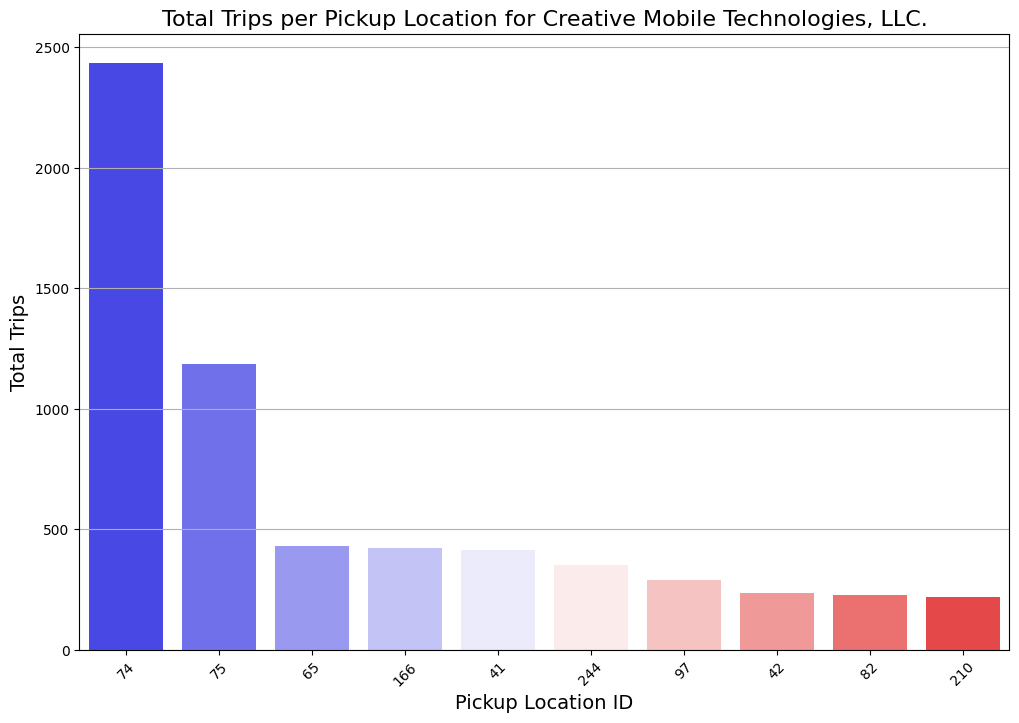

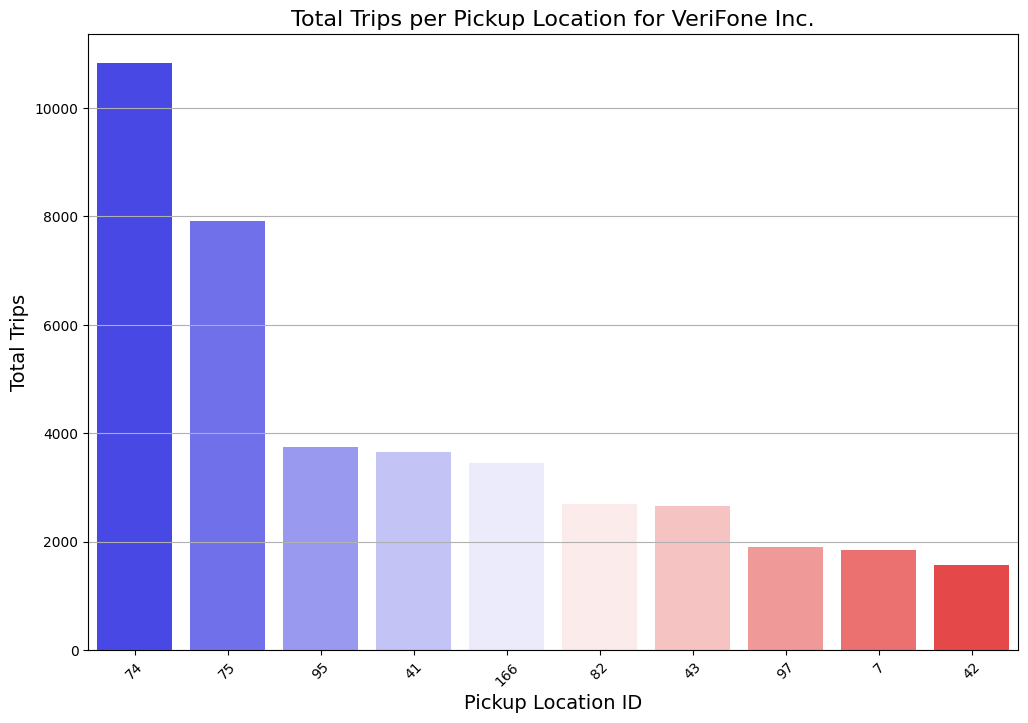

In [49]:
pickup_counts_per_vendor = db_master.groupby(['VendorName', 'PULocationID']).size().reset_index(name='Total Trips')

for vendor in pickup_counts_per_vendor['VendorName'].unique():
    # Filter data for the current vendor
    vendor_data = pickup_counts_per_vendor[pickup_counts_per_vendor['VendorName'] == vendor]
    
    # Sort the vendor's data by total trips in descending order and select the top 10 pickup locations
    top_pickup_locations = vendor_data.sort_values(by='Total Trips', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='PULocationID', y='Total Trips', data=top_pickup_locations, palette='bwr', order=top_pickup_locations['PULocationID'])
    plt.title(f'Total Trips per Pickup Location for {vendor}', fontsize=16)
    plt.xlabel('Pickup Location ID', fontsize=14)
    plt.ylabel('Total Trips', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


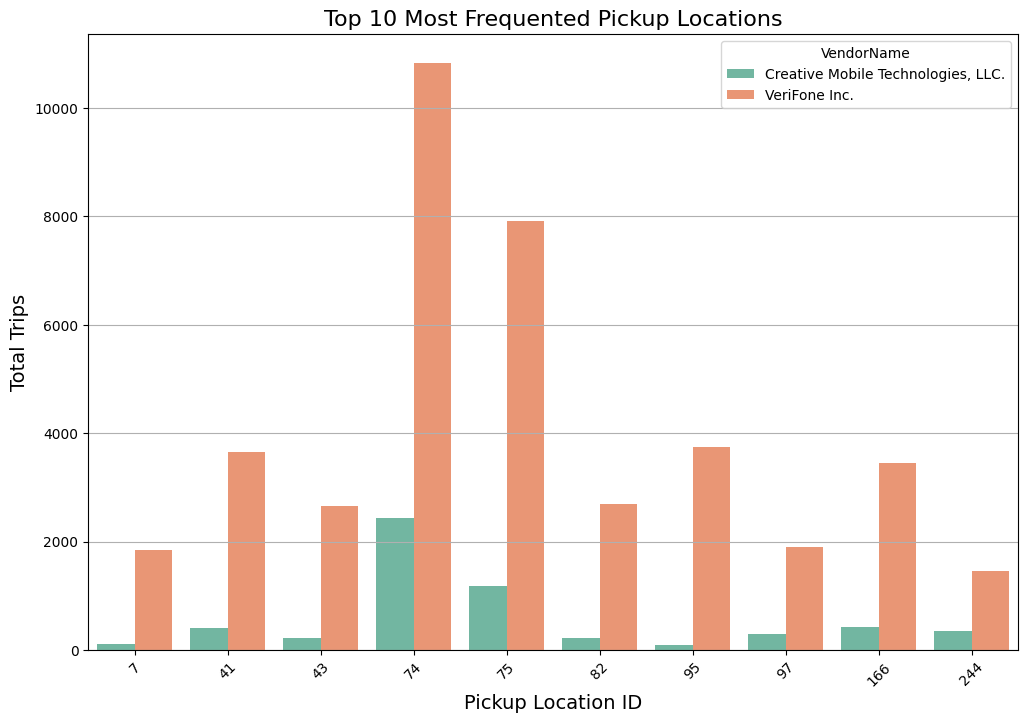

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data
pickup_counts_per_vendor = db_master.groupby(['VendorName', 'PULocationID']).size().reset_index(name='Total Trips')

top_pickup_locations = pickup_counts_per_vendor.groupby('PULocationID').sum().reset_index()
top_pickup_locations = top_pickup_locations.sort_values(by='Total Trips', ascending=False).head(10)

# Filter to only the top 10 pickup locations
top_pickup_locations_ids = top_pickup_locations['PULocationID']
top_pickup_data = pickup_counts_per_vendor[pickup_counts_per_vendor['PULocationID'].isin(top_pickup_locations_ids)]

plt.figure(figsize=(12, 8))
sns.barplot(x='PULocationID', y='Total Trips', hue='VendorName', data=top_pickup_data, palette='Set2')

plt.title('Top 10 Most Frequented Pickup Locations', fontsize=16)
plt.xlabel('Pickup Location ID', fontsize=14)
plt.ylabel('Total Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### **Insights:**
1. Certain pickup locations have consistently higher number of trips comparing to the others. This may indicate high-traffic location
2. Both Vendors has slightly different top 10 pick-up locations


### **Actionable Plans:**
1. Target Specific Routes and Areas for High Demand
    - Identify specific routes or regions with high demand during peak hours and adjust the supply to those areas.
2. Provide ride hailing points in busy areas during peak hours
    - Each vendors can form partnerships with certain office buildings, stations, malls, etc. to provide a hailing point in these locations. Optional: An assistant/representative can be assigned to these locations during peak hours to assist potential customers. Providing in-person representative may be an advantage to increase customer satisfaction.
    - Potential Customers can comfortably wait for their taxi in these hailing points.
    - This enables a more centralized pick-up point for both customers and drivers. Vacant vehicles who are assigned to these locations can stand-by nearby the hailing point.

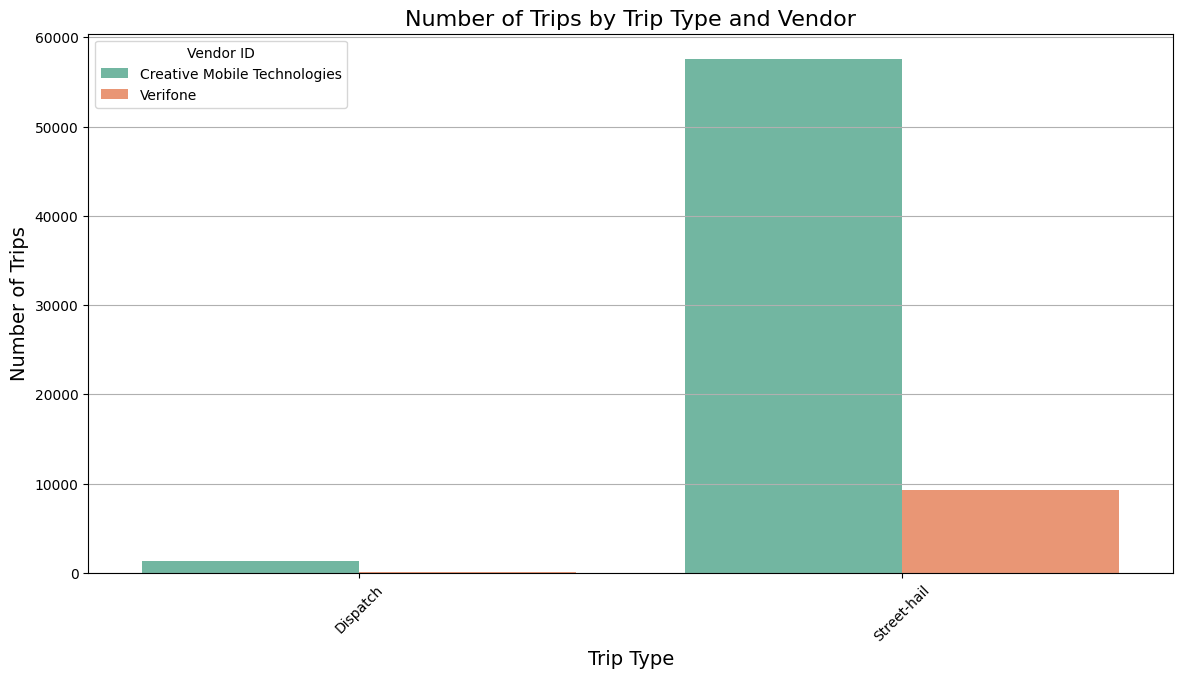

In [51]:
# Map numeric trip_type values to their corresponding labels
trip_type_mapping = {1: 'Street-hail', 2: 'Dispatch'}
db_master['trip_type'] = db_master['trip_type'].map(trip_type_mapping)

# Group by 'trip_type' and 'VendorID' to calculate the number of trips
trip_type_vendor_counts = db_master.groupby(['trip_type', 'VendorID']).size().reset_index(name='Trip Count')

# Plot the double bar chart comparing 'trip_type' and 'VendorID'
plt.figure(figsize=(14, 7))

sns.barplot(x='trip_type', y='Trip Count', hue='VendorID', data=trip_type_vendor_counts, palette='Set2')
plt.title('Number of Trips by Trip Type and Vendor', fontsize=16)
plt.xlabel('Trip Type', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Vendor ID', loc='upper left') 
plt.grid(axis='y')
plt.show()


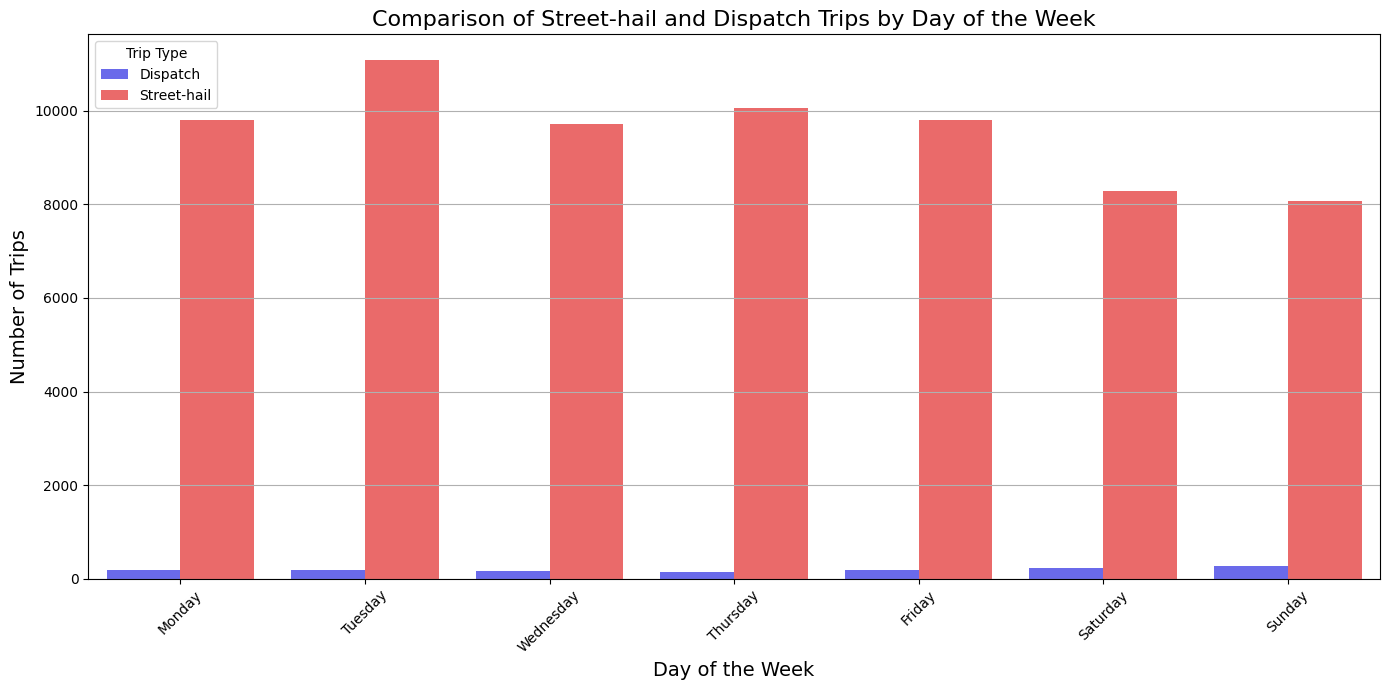

,pickup_day,trip_type,Trip Count
0,Friday,Dispatch,192
1,Friday,Street-hail,9801
2,Monday,Dispatch,198
3,Monday,Street-hail,9795
4,Saturday,Dispatch,232
5,Saturday,Street-hail,8288
6,Sunday,Dispatch,280
7,Sunday,Street-hail,8067
8,Thursday,Dispatch,151
9,Thursday,Street-hail,10057


In [54]:
# Group by 'pickup_day' and 'trip_type' to calculate the number of trips for each combination
trips_by_day_type = db_master.groupby(['pickup_day', 'trip_type']).size().reset_index(name='Trip Count')

# Reorder the days of the week
trips_by_day_type['pickup_day'] = pd.Categorical(trips_by_day_type['pickup_day'], 
                                                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                 ordered=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='pickup_day', y='Trip Count', hue='trip_type', data=trips_by_day_type, palette='seismic')
plt.title('Comparison of Street-hail and Dispatch Trips by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45) 
plt.legend(title='Trip Type', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

trips_by_day_type


### **Insights:**
1. Majority of the Trips are via Street-hail, and a tiny portion of the trips are dispatch
2. Although it is visible that street-hail is more popular, this may indicate lack of efficient dispatch services.

### **Actionable Insights:**
1. Explore app-based dispatch 
    - By promoting efficient app-based dispatch services, drivers can have equal opportunities in getting trips, as dispatch assignments can be managed by system. Driver do not have to be on standby at the exact pick-up spots, as it may cause traffic jam. Drivers can wait at the nearest designated waiting areas and wait for dispatch assignments.
    - Providing an efficient and digitalized hailing application allows vendors to target new market with younger demographics, opening new opportunities for more potential new customers.
2. To further promote dispatch services via application, vendors mat offer competitive subscription pricings, discounts, and rewards.
3. Target off-peak times: Increase dispatch service offerings during off-peak hours or in areas with low street traffic.

